In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xlsxwriter
import pandas_flavor as pf

file_path = r"Fotos periodo completo UCT.csv"
data = pd.read_csv(file_path)

In [2]:
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['hour'] = data['DateTime'].dt.hour
data['hour'].unique()

array([ 2,  3, 17,  0, 14, 10,  8, 22, 12, 18,  6, 20,  7, 21,  9, 11, 19,
       13, 15,  4,  5,  1, 16, 23])

In [3]:
data = data.loc[(data['Year'] != 1970) & (data['Year'] != 2017)]

In [4]:
data["Especie"].unique()

array(['Caballo', 'Carpintero', 'Chingue', 'Chucao', 'Ciervo rojo',
       'Cometocino', 'Concón', 'Diucón', 'Guiña', 'Hued hued', 'Jabali',
       'Jilguero', 'Liebre', 'Monito del monte', 'Perro', 'Peuquito',
       'Picaflor', 'Puma', 'Rata negra', 'Raton cola larga', 'Rayadito',
       'Tiuque', 'Torcaza', 'Traro', 'Vison', 'Zorro culpeo', 'Zorzal',
       nan], dtype=object)

In [5]:
#Usando todos los datos

species1 = "Zorro Culpeo"
data_species1 = data[data["Especie"] == "Zorro culpeo"]
species2 = "Liebre"
data_species2 = data[data["Especie"] == "Liebre"]
species3 = "Puma"
data_species3 = data[data["Especie"] == "Puma"]
species4 = "Jabali"
data_species4 = data[data["Especie"] == "Jabali"]
species5= "Guiña"
data_species5 = data[data["Especie"] == "Guiña"]

In [11]:
species_group = ["Monito del monte", "Raton cola larga", "Rata negra"]
data_species6 = data[data['Especie'].isin(species_group)]

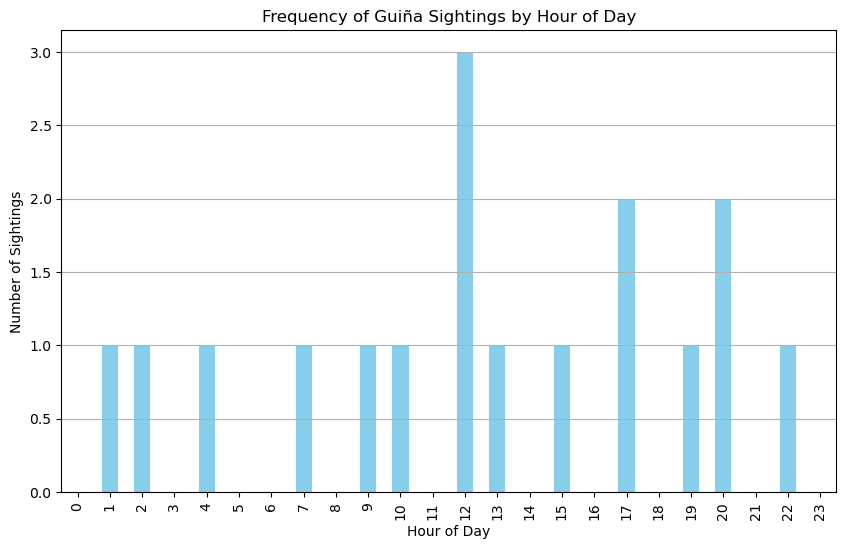

In [20]:
data_species5 = data[data["Especie"] == "Guiña"].copy()
data_species5.loc[:, 'hour'] = data_species5['DateTime'].dt.hour
if 'Episode_ID' in data_species5.columns:
    data_species5 = data_species5.loc[data_species5.groupby('Episode_ID')['Counter0'].idxmax()].copy()
hourly_counts = data_species5['hour'].value_counts().sort_index()
hourly_counts = hourly_counts.reindex(range(24), fill_value=0)


plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Guiña Sightings by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Sightings')
plt.xticks(range(24))
plt.grid(axis='y')
plt.show()


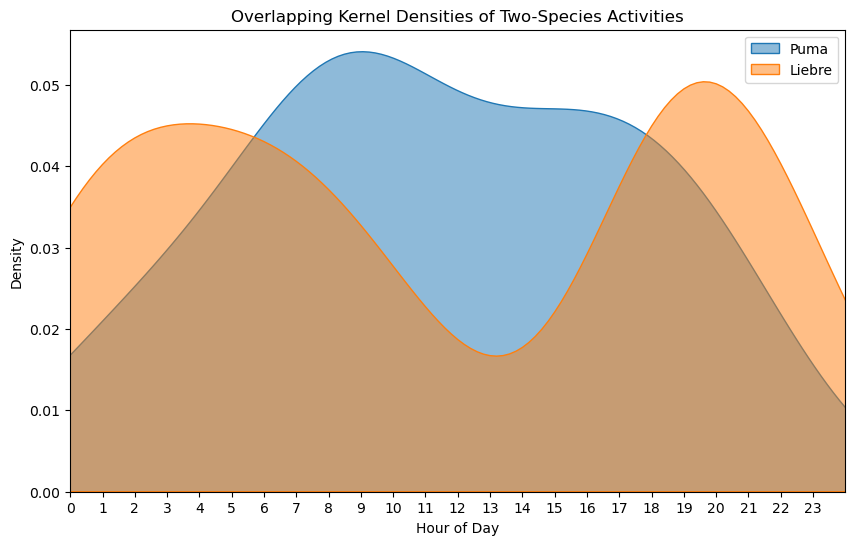

In [7]:
# Plot overlapping kernel densities
plt.figure(figsize=(10, 6))
sns.kdeplot(data_species3['hour'], label=species3, fill=True, common_norm=False, alpha=0.5)
sns.kdeplot(data_species2['hour'], label=species2, fill=True, common_norm=False, alpha=0.5)

plt.title('Overlapping Kernel Densities of Two-Species Activities')
plt.xlabel('Hour of Day')
plt.ylabel('Density')
plt.xlim(0, 24)
plt.xticks(np.arange(0, 24, 1))  # Show every hour on the x-axis
plt.legend()
plt.show()

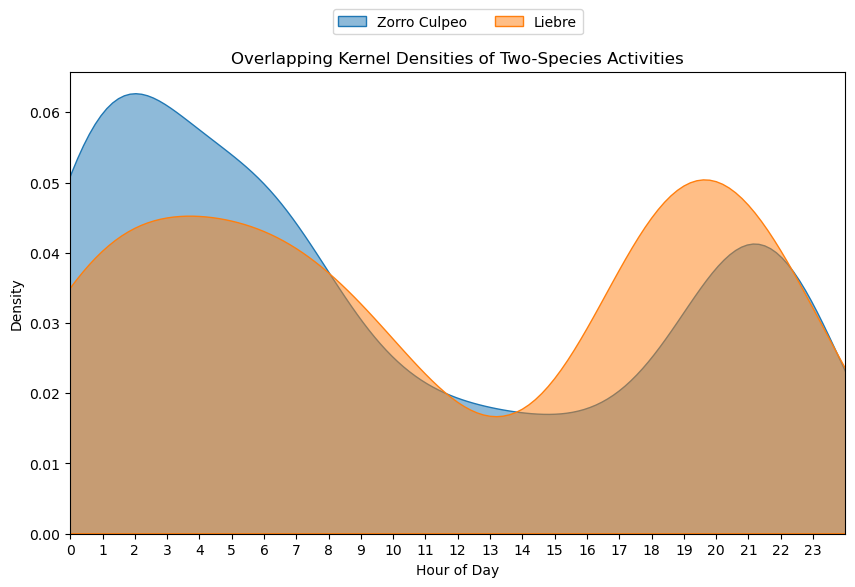

In [8]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data_species1['hour'], label=species1, fill=True, common_norm=False, alpha=0.5)
sns.kdeplot(data_species2['hour'], label=species2, fill=True, common_norm=False, alpha=0.5)

plt.title('Overlapping Kernel Densities of Two-Species Activities')
plt.xlabel('Hour of Day')
plt.ylabel('Density')
plt.xlim(0, 24)
plt.xticks(np.arange(0, 24, 1))  # Show every hour on the x-axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.show()

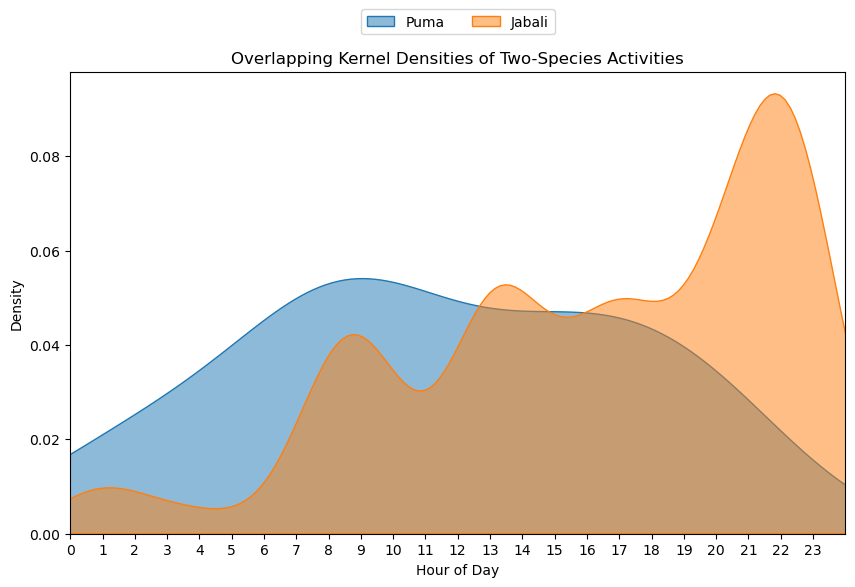

In [13]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data_species3['hour'], label=species3, fill=True, common_norm=False, alpha=0.5)
sns.kdeplot(data_species4['hour'], label=species4, fill=True, common_norm=False, alpha=0.5)

plt.title('Overlapping Kernel Densities of Two-Species Activities')
plt.xlabel('Hour of Day')
plt.ylabel('Density')
plt.xlim(0, 24)
plt.xticks(np.arange(0, 24, 1))  # Show every hour on the x-axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.show()

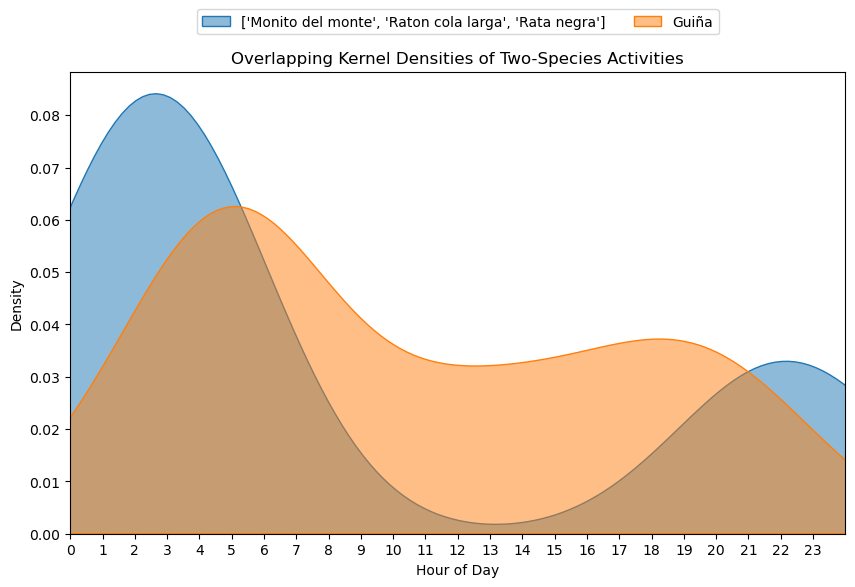

In [17]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data_species6['hour'], label=species_group, fill=True, common_norm=False, alpha=0.5)
sns.kdeplot(data_species5['hour'], label=species5, fill=True, common_norm=False, alpha=0.5)

plt.title('Overlapping Kernel Densities of Two-Species Activities')
plt.xlabel('Hour of Day')
plt.ylabel('Density')
plt.xlim(0, 24)
plt.xticks(np.arange(0, 24, 1))  # Show every hour on the x-axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.show()

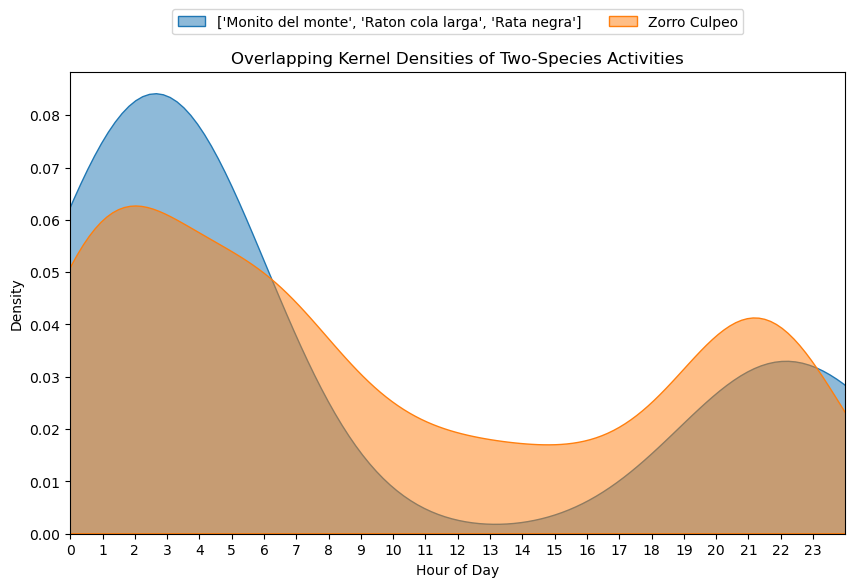

In [15]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data_species6['hour'], label=species_group, fill=True, common_norm=False, alpha=0.5)
sns.kdeplot(data_species1['hour'], label=species1, fill=True, common_norm=False, alpha=0.5)

plt.title('Overlapping Kernel Densities of Two-Species Activities')
plt.xlabel('Hour of Day')
plt.ylabel('Density')
plt.xlim(0, 24)
plt.xticks(np.arange(0, 24, 1))  # Show every hour on the x-axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.show()